<a href="https://colab.research.google.com/github/ReyFrank92/joyofcoding/blob/main/TF2_0_Stock_Returns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Install TensorFlow
!pip install -q tensorflow-gpu==2.9.0
import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 511.7 MB 4.3 kB/s 
     |████████████████████████████████| 1.6 MB 34.5 MB/s 
     |████████████████████████████████| 5.8 MB 39.1 MB/s 
     |████████████████████████████████| 438 kB 55.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220527125636 requires keras<2.9,>=2.8.0rc0, but you have keras 2.9.0 which is incompatible.
tensorflow 2.8.2+zzzcolab20220527125636 requires tensorboard<2.9,>=2.8, but you have tensorboard 2.9.1 which is incompatible.
tensorflow 2.8.2+zzzcolab20220527125636 requires tensorflow-estimator<2.9,>=2.8, but you have tensorflow-estimator 2.9.0 which is incompatible.
2.9.0


In [4]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense,  GRU, LSTM, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [5]:
#Yes, you can read dataframes from URLs
df = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv')

In [6]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


In [7]:
df.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,56.280,56.42,55.89,56.00,14690146,SBUX
1255,2018-02-02,55.900,56.32,55.70,55.77,15358909,SBUX
1256,2018-02-05,55.530,56.26,54.57,54.69,16059955,SBUX
1257,2018-02-06,53.685,56.06,53.56,55.61,17415065,SBUX
1258,2018-02-07,55.080,55.43,54.44,54.46,13927022,SBUX


In [8]:
# start by doing the WRONG thing - trying to predict the price itself
series = df['close'].values.reshape(-1,1)

In [11]:
#Normaize the data 
#NOte: I didn't think about where the true boundary is, this is just approx.
scaler = StandardScaler() # z = (x - u) / s // if with_mean = False => u(mean) = 0  // if with_std = False => s(std desv) = 1 // x is the sample 
scaler.fit(series[:len(series)//2]) #usamos el fit function solo en la primera mitad de la serie. Esto es porque no queremos incluir el test data in el training pipeline //normaliza la primera mitad de los datos
series = scaler.transform(series).flatten() #copy a given array an collapsed into one dimmension

In [21]:
### build the dataset []
T = 10
D = 1
X = []
Y = []
for t in range(len(series)- T): #lo que mida la serie -10
  x = series[t:t+T] # cuando t = 1, entonces corre de 1 a 11, cuando es 2 , corre de 2 a 12 ya si (en la primera iteración irá de 0 a 9 porque T =10)
  X.append(x)  #Se anexa el x al final 
  y = series[t+T]  #si t  = 3 entonces es 13. i.e. se busca la observación 13 estando en el 3.
  Y.append(y) #Se anexa el y al final

X = np.array(X).reshape(-1, T, 1) #NOw the data should be N x T x D #Una vez que tienes un array, ahora transpones los arrays de tal forma que tenga T(osea 10) cada una, los -1 sirven si no sabes cuando hay en algo pero la pc los acomoda automaticamente
Y = np.array(Y) #Se crea un array con los valore Y
N = len(X) #el número de items en X
print("X.shape", X.shape, "Y.shape", Y.shape)

# N = number of samples
# T = sequence length
# D = number of input features
# M = number of hideen units 
# K = number of output units

X.shape (1249, 10, 1) Y.shape (1249,)


In [22]:
#try autoregressive RNN model []
i = Input(shape=(T,1)) #es solo poner una entrada, en este caso 10 porque es la primera capa y uno busca un AR(10) #Aca si se pone (T,1)
x = LSTM(5)(i) #simpleRNN(5,activation='relu')(i) # el por defecto es un tanh
x = Dense(1)(x) #final layer is one #solo es una capa. 
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.1),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2], # si fuera _1 , signfica que la borra la última observacion,entonces -N borra todo pero //2 significa que toma última mitad de los datos
  epochs = 80,
  validation_data=(X[-N//2:], Y[-N//2:]), #valida con los mismos datos
)

# Select the last element in the list
# (the slice starts at the last element, and ends at the end of the list)

Epoch 1/80
20/20 [==============================] - 3s 40ms/step - loss: 0.1951 - val_loss: 0.2360
Epoch 2/80
20/20 [==============================] - 1s 36ms/step - loss: 0.0275 - val_loss: 0.0656
Epoch 3/80
20/20 [==============================] - 0s 9ms/step - loss: 0.0119 - val_loss: 0.0946
Epoch 4/80
20/20 [==============================] - 0s 9ms/step - loss: 0.0085 - val_loss: 0.0297
Epoch 5/80
20/20 [==============================] - 0s 11ms/step - loss: 0.0061 - val_loss: 0.0300
Epoch 6/80
20/20 [==============================] - 0s 9ms/step - loss: 0.0052 - val_loss: 0.0244
Epoch 7/80
20/20 [==============================] - 0s 9ms/step - loss: 0.0056 - val_loss: 0.0209
Epoch 8/80
20/20 [==============================] - 0s 10ms/step - loss: 0.0056 - val_loss: 0.0217
Epoch 9/80
20/20 [==============================] - 0s 11ms/step - loss: 0.0066 - val_loss: 0.0401
Epoch 10/80
20/20 [==============================] - 0s 12ms/step - loss: 0.0069 - val_loss: 0.0337
Epoch 11/80
2

40/40 [==============================] - 1s 2ms/step
(1249, 1)


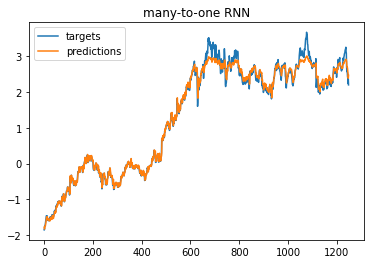

In [23]:
#One-step forecast using true targets
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions,label='predictions')
plt.title("many-to-one RNN")
plt.legend()
plt.show()

1/1 [==============================] - 0s 20ms/step


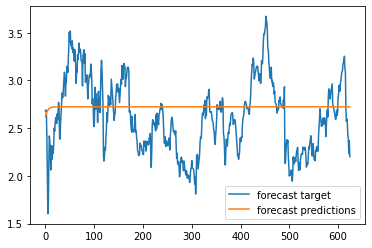

In [24]:
#Mutli-step forecast
validation_target = Y[-N//2:]
validation_predictions = []

#last train input
last_x = X[-N//2] #1 - D array of lenght T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, T, 1))[0,0] #1x1 array -> scalar

  #update the predictions list
  validation_predictions.append(p)

  #make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label = 'forecast target')
plt.plot(validation_predictions, label ='forecast predictions')
plt.legend()

In [26]:
# calculate returns by first shifting the data
df ['PrevClose'] = df['close'].shift(1) # move everything up 1

#so now it's like
#close / prev close
# x[2] x [1]
# X[3] x [ 2]
#...
# x[t] x[t-1]

In [27]:
df.head() #Tomamos 10 para predecir el 11

,date,open,high,low,close,volume,Name,PrevClose
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915


In [28]:
# Then the return is
# (x[t] - x[t-1]) / x[t-1]
df['Return'] = (df['close'] - df['PrevClose']) / df['PrevClose']

In [29]:
df.head()

,date,open,high,low,close,volume,Name,PrevClose,Return
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


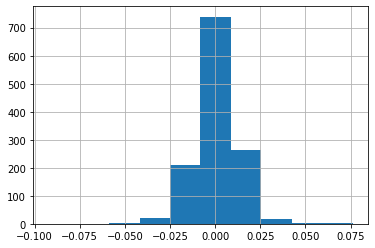

In [30]:
# NOw let's try an LSTM to predict returns
df['Return'].hist()

In [31]:
series = df['Return'].values[1:].reshape(-1,1)

#Normaize the data 
#NOte: I didn't think about where the true boundary is, this is just approx.
scaler = StandardScaler() # z = (x - u) / s // if with_mean = False => u(mean) = 0  // if with_std = False => s(std desv) = 1 // x is the sample 
scaler.fit(series[:len(series) // 2]) #usamos el fit function solo en la primera mitad de la serie. Esto es porque no queremos incluir el test data in el training pipeline //normaliza la primera mitad de los datos
series = scaler.transform(series).flatten() #copy a given array an collapsed into one dimmension

In [32]:
### build the dataset 
# let's see if we can use t past values to predict the next value

T = 10
D = 1
X = []
Y = []
for t in range(len(series)- T): #lo que mida la serie -10
  x = series[t:t+T] # cuando t = 1, entonces corre de 1 a 11, cuando es 2 , corre de 2 a 12 ya si (en la primera iteración irá de 0 a 9 porque T =10)
  X.append(x)  #Se anexa el x al final 
  y = series[t+T]  #si t  = 3 entonces es 13. i.e. se busca la observación 13 estando en el 3.
  Y.append(y) #Se anexa el y al final

X = np.array(X).reshape(-1, T, 1) #NOw the data should be N x T x D #Una vez que tienes un array, ahora transpones los arrays de tal forma que tenga T(osea 10) cada una, los -1 sirven si no sabes cuando hay en algo pero la pc los acomoda automaticamente
Y = np.array(Y) #Se crea un array con los valore Y
N = len(X) #el número de items en X
print("X.shape", X.shape, "Y.shape", Y.shape)

# N = number of samples
# T = sequence length
# D = number of input features
# M = number of hideen units 
# K = number of output units

X.shape (1248, 10, 1) Y.shape (1248,)


In [33]:
#try autoregressive RNN model []
i = Input(shape=(T,1)) #es solo poner una entrada, en este caso 10 porque es la primera capa y uno busca un AR(10) #Aca si se pone (T,1)
x = LSTM(5)(i) #simpleRNN(5,activation='relu')(i) # el por defecto es un tanh
x = Dense(1)(x) #final layer is one #solo es una capa. 
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.1),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2], # si fuera _1 , signfica que la borra la última observacion,entonces -N borra todo pero //2 significa que toma última mitad de los datos
  epochs = 80,
  validation_data=(X[-N//2:], Y[-N//2:]), #valida con los mismos datos
)

# Select the last element in the list
# (the slice starts at the last element, and ends at the end of the list)

20/20 [==============================] - 0s 10ms/step - loss: 0.9376 - val_loss: 1.1887
Epoch 50/80
20/20 [==============================] - 0s 11ms/step - loss: 0.9575 - val_loss: 1.1730
Epoch 51/80
20/20 [==============================] - 0s 10ms/step - loss: 0.9193 - val_loss: 1.2274
Epoch 52/80
20/20 [==============================] - 0s 10ms/step - loss: 0.9385 - val_loss: 1.2186
Epoch 53/80
20/20 [==============================] - 0s 10ms/step - loss: 0.9340 - val_loss: 1.1607
Epoch 54/80
20/20 [==============================] - 0s 10ms/step - loss: 0.9260 - val_loss: 1.2386
Epoch 55/80
20/20 [==============================] - 0s 10ms/step - loss: 0.9440 - val_loss: 1.1705
Epoch 56/80
20/20 [==============================] - 0s 11ms/step - loss: 0.9692 - val_loss: 1.1555
Epoch 57/80
20/20 [==============================] - 0s 11ms/step - loss: 0.9636 - val_loss: 1.1663
Epoch 58/80
20/20 [==============================] - 0s 10ms/step - loss: 0.9481 - val_loss: 1.2184
Epoch 59/80


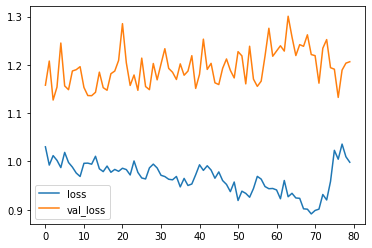

In [34]:
#Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

39/39 [==============================] - 1s 2ms/step
(1248, 1)


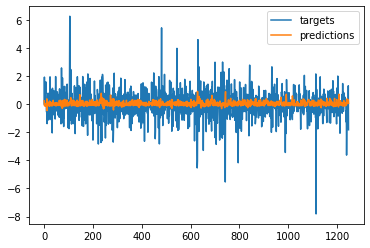

In [35]:
#One-step forecast using true targets
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions,label='predictions')
plt.legend()
plt.show()

1/1 [==============================] - 0s 19ms/step


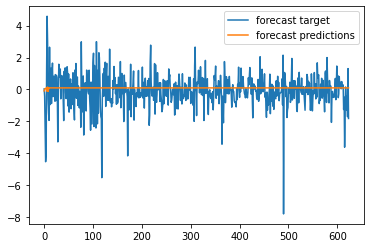

In [36]:
#Mutli-step forecast
validation_target = Y[-N//2:]
validation_predictions = []

#last train input
last_x = X[-N//2] #1 - D array of lenght T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, T, 1))[0,0] #1x1 array -> scalar

  #update the predictions list
  validation_predictions.append(p)

  #make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label = 'forecast target')
plt.plot(validation_predictions, label ='forecast predictions')
plt.legend()

In [ ]:
#